   # ML - Assigment 2 
   Juan Sebastian Corredor Rodriguez - jucorredorr@unal.edu.co
   
   Valentina Cobo Paz - vcobop@unal.edu.co

Import data from datasets

In [1]:
#import the needed libraries and functions
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pylab as plt
import numpy as np
from numpy import cov
import scipy as sp

In [2]:
iris = datasets.load_iris() #dataset as dictionary
X = iris.data[: , [1,3]] #del array con los datos, las columnas 1 y 3 que son sepal y petal width
Y = iris.target #key del diccionario target, clases

In [3]:
#donvert the arrays in a dataframe
l={"Classes":Y,"Sepal Width":X[:,0],"Petal Width":X[:,1]} #dictionary
data = pd.DataFrame(data = l) #dataframe from pandas
data.head()

,Classes,Sepal Width,Petal Width
0,0,3.5,0.2
1,0,3.0,0.2
2,0,3.2,0.2
3,0,3.1,0.2
4,0,3.6,0.2


In [4]:
data.keys() #header
len(data) #length
type(data)

pandas.core.frame.DataFrame

Plot the resulting dataset, with a different color for each class

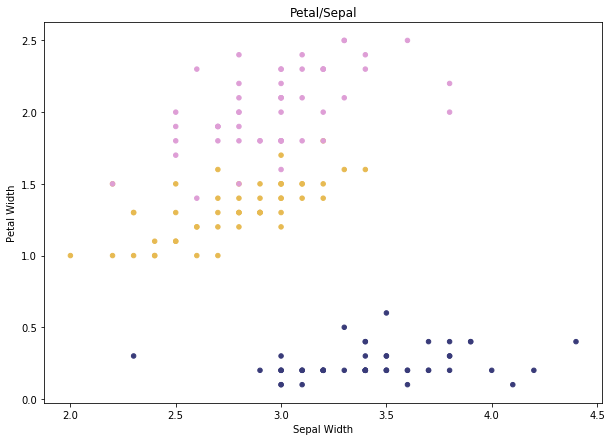

In [5]:
data.plot(x="Sepal Width",y="Petal Width",kind="scatter",c=data["Classes"],colormap="tab20b",colorbar=False,title="Petal/Sepal",figsize=(10,7)) 
#plot function of pandas
plt.show()


### 1.a) 
for the propability density function (pdf), we calculate the mean of each attribute and a unique variance for the entire dataset, following the assumption that $\Sigma= \mathbb{I}\sigma$, where $\sigma$ is shared by all the classes and therefore by all the attributes.
In order to find this share $\sigma$, for the variance matrix for the two attributes and three classes, we calculate the mean of the $\sigma$ foreach attribute and after the mean for this two, finally we have one $\sigma$ for all the data.

In [6]:
mean_data = data.groupby("Classes").mean().values #group the elements 
print(mean_data)

[[3.428 0.246]
 [2.77  1.326]
 [2.974 2.026]]


In [7]:
std_data = data.groupby("Classes").std()
print(std_data)


sigma_estimated_per_class = std_data.mean(axis = 1)
print(sigma_estimated_per_class)

         Sepal Width  Petal Width
Classes                          
0           0.379064     0.105386
1           0.313798     0.197753
2           0.322497     0.274650
Classes
0    0.242225
1    0.255776
2    0.298573
dtype: float64


For each class we obtain a $\sigma_i$ estimated, and estimate its covariance matrix as $S_i = I\sigma_i$. Finally we estimate the covariance matrix $S = I\sigma$ as
$$S = \sum \hat{P}_iS_i$$
where $\hat{P}_i$ is the empiric probability of class $i$.

In [8]:
#estimate of sigma
proportions_per_class = (data.groupby("Classes").size())/(len(data.index)) ; print(proportions_per_class)

sigma_hat = sum(sigma_estimated_per_class*proportions_per_class) ; print(sigma_hat)
std_data = sigma_hat

Classes
0    0.333333
1    0.333333
2    0.333333
dtype: float64
0.2655246092780991


### 1.b) 
For calculate the discriminant function for each class, we have that:
The probability that a number (x) belong to a class (c) is:

$$P(c_{1}|x) \:\alpha\:P(x|c_{1})P(c_{1})$$

then, for discriminate a value into a class, for a given class (c1), ¿what's the probability that a point (x,y) being classified in c1?, the attributes x and y are indenpendent, for this reason we can separate the two probabilities, like this:

$$P((x_{i},y_{i})|c_{1}) = P((x_{i})|c_{1}) P((y_{i})|c_{1})$$

for calculate the probability density function (pdf) of a Gaussian function for each probability

### $$\frac{\exp\left(-0.5(x_{i}-\mu_{i})^2\sigma^{-2}\right)}{\sqrt{2\pi\sigma^2}}$$

that we will use in the discriminant function, for each class we calcuate the pdf of each attribute and the prior.


In [9]:
def pdf_gauss(x,mean,std):
    G = (1.0/np.sqrt(2*np.pi*std**2))*np.exp(-0.5*((x-mean)**2/std**2))
    return G
def discriminant(x,y,mean,std,classes,prior): #when x is the sepal width and y is the petal width that we need discriminate
    results=[]
    for i in range(len(classes)):
        #print (mean[i,0],mean[i,1])
        px = pdf_gauss(x,mean[i,0],std)
        py = pdf_gauss(y,mean[i,1],std)
        pc = prior[i]
        result = px*py*pc
        results.append(result)
    out=np.argmax(results) #return the position of the class with the maximun element
    return out


In [10]:
flowers = data["Classes"].unique() #array of the classes

In [11]:
prior = (data["Classes"].value_counts()/len(data)).values #array of the probabilities of each class 
prior

array([0.33333333, 0.33333333, 0.33333333])

In [12]:
discriminant(0.4 , 4.5 , mean_data , std_data , flowers , prior) #example of the discrimant function result

2

### 1.c) Plot with the different regions correspondig to the different classes. 
Firstly we create a matrix (100,100) in the interval of sepal and petal width meassure and calculate the discriminant function for each one of this points, that are classificated in one of the three classes, with this information is possible make a contour graph of the meassure space.

In [13]:
n = 100 #number of points for xx and yy in the matrix
xx = np.linspace(2.0 , 4.6 , n) #linspace make a array with a n numbers for the interval between 2.0 and 4.6
yy = np.linspace(0.0 , 2.6 , n)
classification=[]
for j in yy:
    for i in xx:
        classification.append(discriminant(i , j , mean_data , std_data , flowers , prior))

In [14]:
classification = np.array(classification)
len(classification)

10000

In [15]:
xxx , yyy = np.meshgrid(xx , yy) #meshgrid make a matrix of the array copies (100*100)
classification_matrix = classification.reshape(xxx.shape) #reshape make a matrix of a vector, with the shape of xxx

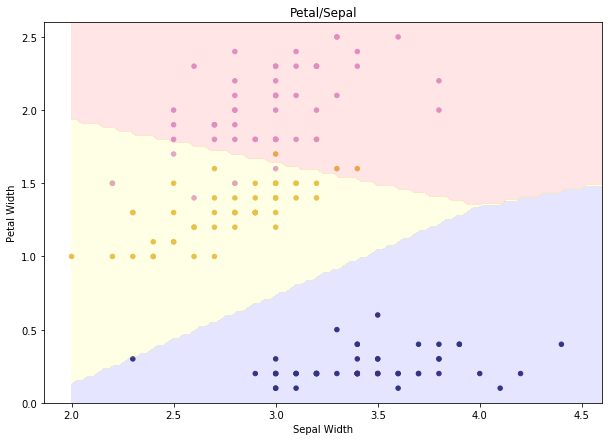

In [16]:
ax = data.plot(x = "Sepal Width" , y = "Petal Width" , kind = "scatter" , c = data["Classes"] , colormap = "tab20b" , colorbar = False , title = "Petal/Sepal" , figsize = (10,7)) #plot function of pandas
ax.contourf(xxx , yyy , classification_matrix , 2 , alpha = 0.1 , colors = ("blue" , "yellow" , "red"))

plt.show()

### 1.d) Boundary between class region

In order to obtain the equations that represent the boundaries between classes, we calculated the stright line function of the three classes with the probability density function of each one, in where $f_{1} = f_{2}$ and $f_{2} = f_{3}$ and $f_{1} = f_{3}$. 

for the class i and j, we have:
$$P(x_{i} | C_{i})P(y_{i}|C_{i})P(C_{i}) = P(x_{i} | C_{j})P(y_{i}|C_{j})P(C_{j})$$

therefore, solving for $x$ and $y$, we get

$$y= x\frac{\mu_{jx}-\mu_{ix}}{\mu_{iy}- \mu_{jy}} + \frac{\mu_{ix}^2 + \mu_{iy}^2 - \mu_{jy}^2 - \mu_{jx}^2}{2(\mu_{iy} - \mu_{jy})}$$

In [17]:
slopes = []
intercepts = []
for i in flowers:
    for j in flowers:
        if i >= j:
            next
        else:
            mean_ix , mean_jx = mean_data[i,0] , mean_data[j,0]
            mean_iy , mean_jy = mean_data[i,1] , mean_data[j,1]
            slope = (mean_jx-mean_ix)/(mean_iy-mean_jy)
            intercept = ((mean_ix**2 + mean_iy**2)-(mean_jy**2 + mean_jx**2))/(2*(mean_iy - mean_jy))
            slopes.append(slope)
            intercepts.append(intercept)

In [18]:
lines = {'Slope': slopes , 'Intercept': intercepts}
lines = pd.DataFrame(lines, columns= ['Slope', 'Intercept'])
lines

,Slope,Intercept
0,0.609259,-1.102094
1,0.255056,0.319565
2,-0.291429,2.512983


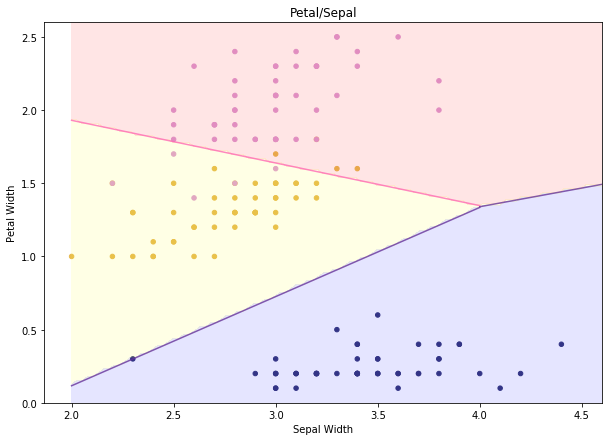

In [19]:
# Create a list of values in the best fit line
def recta(x , m , b):
    return m*x+b

# Plot the best fit line over the actual values
ax = data.plot(x = "Sepal Width" , y = "Petal Width" , kind = "scatter" , c = data["Classes"] , colormap = "tab20b" , colorbar = False , title = "Petal/Sepal" , figsize = (10,7)) #plot function of pandas
ax.contourf(xxx,yyy , classification_matrix , 2 , alpha = 0.1 , colors = ("blue" , "yellow" , "red"))
#for i in flowers:
#    y=recta(a, slopes[i], intercepts[i])
#    ax.plot(a,y)
a = np.linspace(2 , 4 , 50)
b = np.linspace(4 , 4.6 , 20)
ax.plot(a ,recta(a , slopes[0] , intercepts[0]) , color = "rebeccapurple" , alpha = 0.8)
ax.plot(a ,recta(a , slopes[2] , intercepts[2]) , color = "hotpink" , alpha = 0.8)
ax.plot(b ,recta(b , slopes[1] , intercepts[1]) , color = "rebeccapurple" , alpha = 0.8)

plt.show()

### 1.e) changing the priors
The centroid in the plot change in the sametime that the prior, we make a simulation with diferents priors generated randomly, in the purpose of check this assumption, with this results we get a region conserved with differents priors, the blue area that correspond to the first class and in the other hand a "soft" boundary between the second and third class, due to the two class shared a region of points, in this area show a greather change with the differents priors.


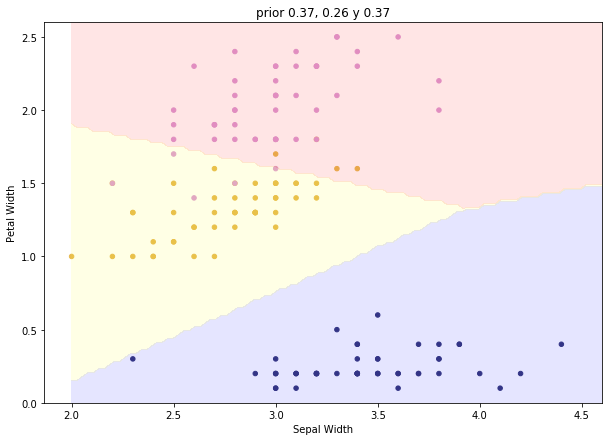

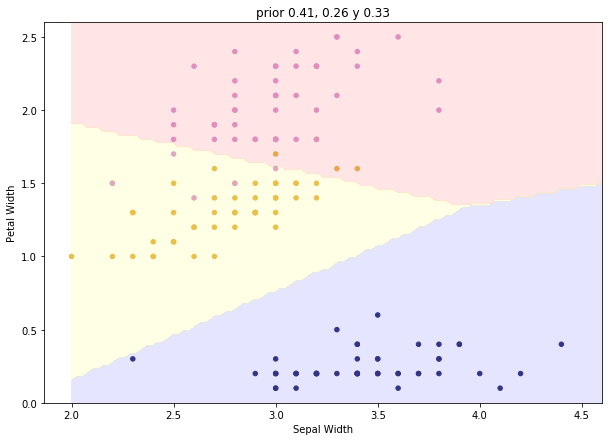

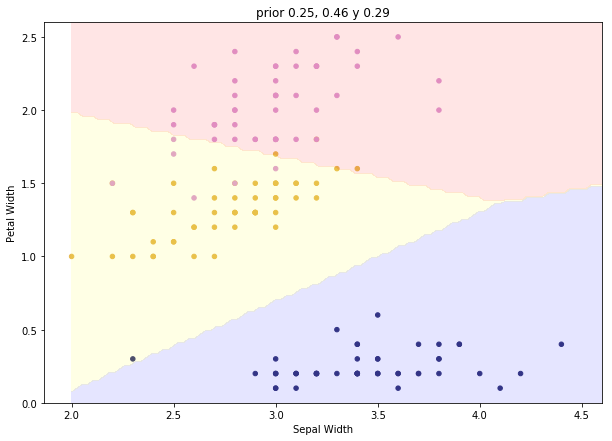

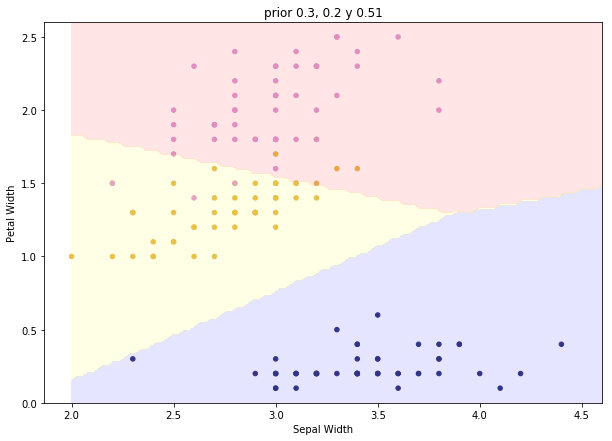

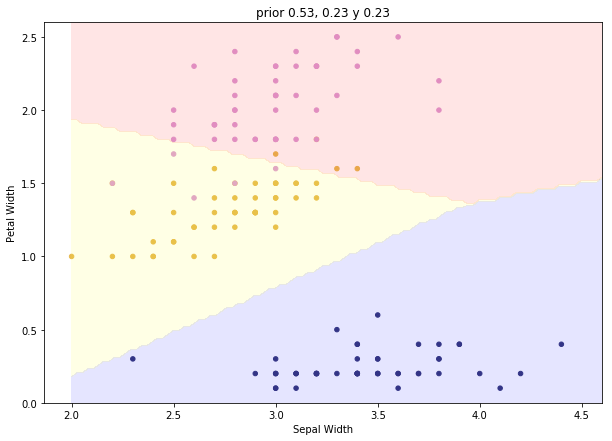

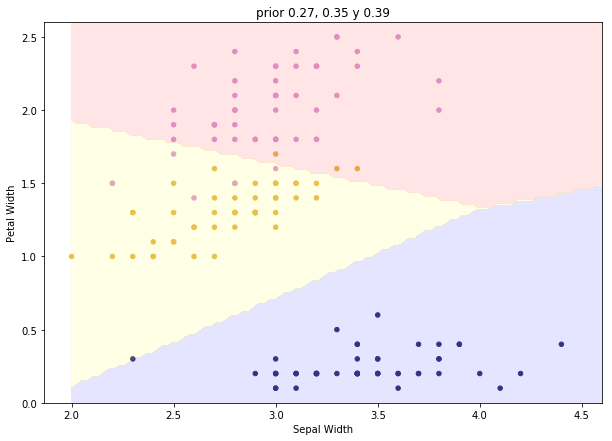

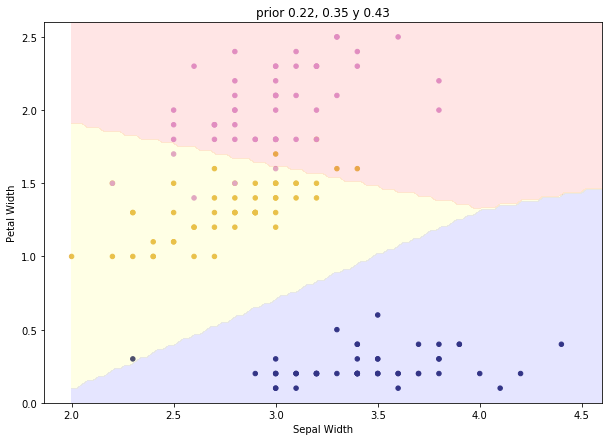

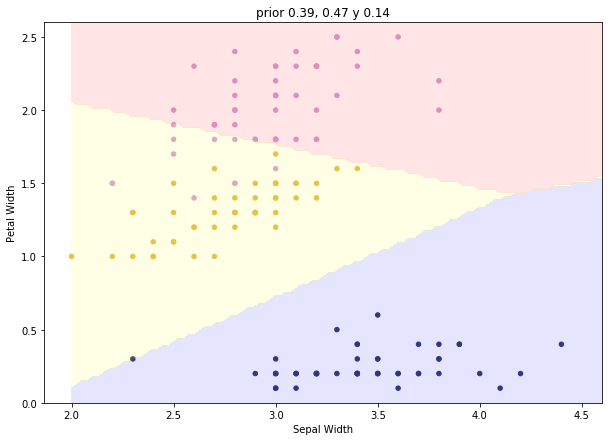

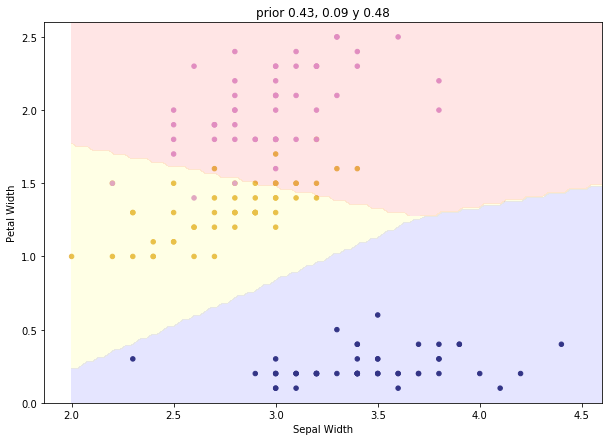

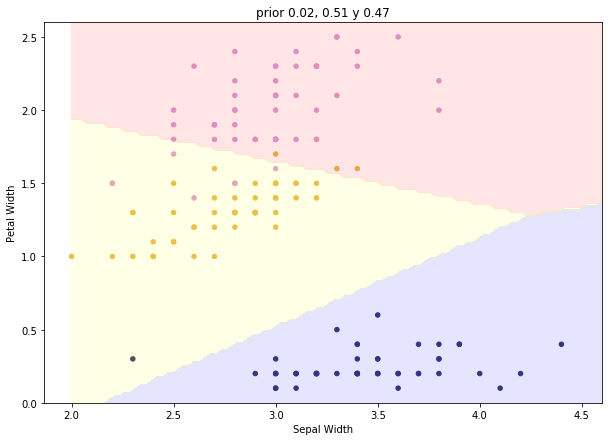

In [20]:
for i in range(10):
    rand=np.random.random(size=3)
    rand=rand/np.sum(rand)
    classification=[]
    for j in yy:
        for i in xx:
            classification.append(discriminant(i , j , mean_data , std_data , flowers , rand))
    classification = np.array(classification)
    xxx , yyy = np.meshgrid(xx , yy) #meshgrid make a matrix of the array copies (100*100)
    classification_matrix = classification.reshape(xxx.shape) #reshape make a matrix of a vector, with the shape of xxx
    ax = data.plot(x = "Sepal Width" , y = "Petal Width" , kind = "scatter" , c = data["Classes"] , colormap = "tab20b" , colorbar = False , title = "prior {}, {} y {}".format(round(rand[0],2),round(rand[1],2),round(rand[2],2)) , figsize = (10,7)) #plot function of pandas
    ax.contourf(xxx , yyy , classification_matrix , 2 , alpha = 0.1 , colors = ("blue" , "yellow" , "red"))

    
    plt.show()

## 2.0)  possibility of rejection
we make the same steps for the last item, with the same discriminant function, but in this time we make a conditional that evaluate if the maximum probability of each point is greather than $1-\lambda$, where lambda is a number between 0 and 1. We choose a lambda = 0.15 because is the number that show a better clasificated area for the classes, with the boundaries defined and the points of the class two and three that are overlaped were not classified in any class.

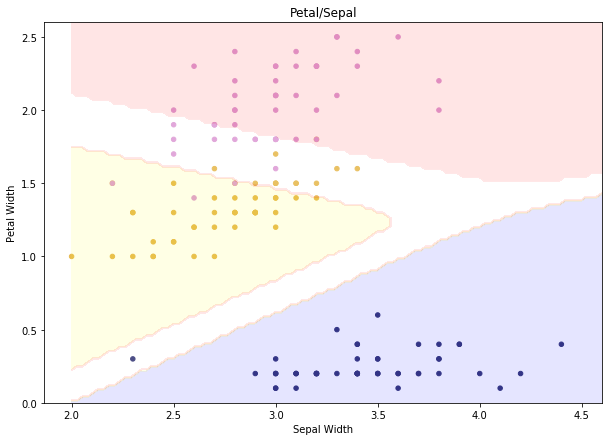

In [21]:
def discriminant_cost(x,y,mean,std,classes,prior,lamb): #when x is the sepal width and y is the petal width that we need discriminate
    results=[]
    for i in range(len(classes)):
        #print (mean[i,0],mean[i,1])
        px = pdf_gauss(x , mean[i , 0] , std)
        py = pdf_gauss(y , mean[i , 1] , std)
        pc = prior[i]
        result = px*py*pc
        results.append(result)
    results = np.array(results)
    norm= results/np.sum(results)
    if np.max(norm) > 1 - lamb:
        return np.argmax(norm)
    else:
        return 3
    #out=np.argmax(resultados) #return the position of the class with the maximun element
    #return out
classification_cost=[]
lamb = 0.15
for j in yy:
    for i in xx:
        classification_cost.append(discriminant_cost(i,j,mean_data,std_data,flowers,prior,lamb))

classification_cost = np.array(classification_cost)
classification_matrix_cost = classification_cost.reshape(xxx.shape) #reshape make a matrix of a vector, with the shape of xxx
ay=data.plot(x = "Sepal Width" , y = "Petal Width" , kind = "scatter" , c = data["Classes"] , colormap = "tab20b" , colorbar = False , title = "Petal/Sepal" , figsize = (10 , 7)) #plot function of pandas
ay.contourf(xxx , yyy , classification_matrix_cost , 3 , alpha = 0.1 , colors=("blue" , "yellow" , "red" , "white"))


plt.show()

### 3.a) 
We pick a train dataset and a test dataset fixing the seed.

In [35]:
data_train, data_test = train_test_split(data , test_size = 0.2 , random_state = 200)

We estimated the means and covs matrices for each class in the train dataset, so as the priors.

In [23]:
means_data = data_train.groupby("Classes").mean() ; print('Mean Vector per Class:\n' , means_data)
covs_data = data_train.groupby("Classes").cov() ; print('\n Covariance Matrix per Class:\n' , covs_data)
proportions_per_class = (data_train.groupby("Classes").size())/(len(data_train.index)) ; print('\n Priors per Class:\n ' , proportions_per_class)

Mean Vector per Class:
          Sepal Width  Petal Width
Classes                          
0           3.461538     0.248718
1           2.820000     1.355000
2           2.951220     2.009756

 Covariance Matrix per Class:
                      Sepal Width  Petal Width
Classes                                      
0       Sepal Width     0.129271     0.008239
        Petal Width     0.008239     0.012564
1       Sepal Width     0.082154     0.031179
        Petal Width     0.031179     0.036385
2       Sepal Width     0.108561     0.044738
        Petal Width     0.044738     0.074902

 Priors per Class:
  Classes
0    0.325000
1    0.333333
2    0.341667
dtype: float64



### 3.b) 
For calculate the discriminant function for each class, we have that:
The probability that a number (x) belong to a class (c) is:

$$P(c_{1}|x)=\frac{P(x|c_{1})P(c_{1})}{P(x)}$$

then, for discriminate a value into a class, for a given class (c1), ¿what's the probability that a point (x,y) being classified in c1?
For calculate the probability density function (pdf) of a Gaussian function for each probability

#### $$\frac{\exp\left(-\frac 1 2 ({\mathbf x}-{\boldsymbol\mu})^\mathrm{T}{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})\right)}{\sqrt{(2\pi)^k|\boldsymbol\Sigma|}}$$

that we will use in the discriminant function, for each class we calcuate the pdf of each attribute and the prior.

We pick the $\lambda = 0.15$ like we do in item $2$.

In [24]:
def pdf_gauss_multivariate(x , mean , covariance):
    centrar = x - np.array(mean)
    centrar = np.matrix(centrar)
    cov_mat = np.matrix(covariance)
    G = (1.0/np.sqrt(((2*np.pi)**len(x))*np.linalg.det(cov_mat)))*np.exp(-0.5*((centrar)*(np.linalg.inv(cov_mat))*(centrar.transpose())))
    G = np.reshape(np.array(G) , 1)
    #print(G)
    return G
def discriminant_2(x , mean , covariance , classes , prior , lamb): #when x is the sepal width and y is the petal width that we need discriminate
    results=[]
    for i in range(len(classes)):
        #print (mean[i,0],mean[i,1])
        pxy = pdf_gauss_multivariate(x , mean.values[i , :] , covariance.groupby('Classes').get_group(i).values)
        pc = prior[i]
        result = pxy*pc
        #print(result)
        results.append(result)
    #print(results)
    norm= results/np.sum(results)
    if np.max(norm) > 1 - lamb:
        return np.argmax(norm)
    else:
        return 3 #return the position of the class with the maximun element


In [25]:
discriminant_2([2.9,0.33], means_data , covs_data , flowers , proportions_per_class , lamb = 0.15) #Example

0

In [26]:
n = 100 #number of points for xx and yy in the matrix
xx = np.linspace(2.0 , 4.6 , n) #linspace make a array with a n numbers for the interval between 2.0 and 4.6
yy = np.linspace(0.0 , 2.6 , n)
classification=[]
for j in yy:
    for i in xx:
        x = [i,j]
        classification.append(discriminant_2(x , means_data , covs_data , flowers , proportions_per_class , lamb = 0.15))

In [27]:
classification = np.array(classification)
len(classification)

10000

In [28]:
xxx , yyy = np.meshgrid(xx , yy) #meshgrid make a matrix of the array copies (100*100)
classification_matrix = classification.reshape(xxx.shape) #reshape make a matrix of a vector, with the shape of xxx

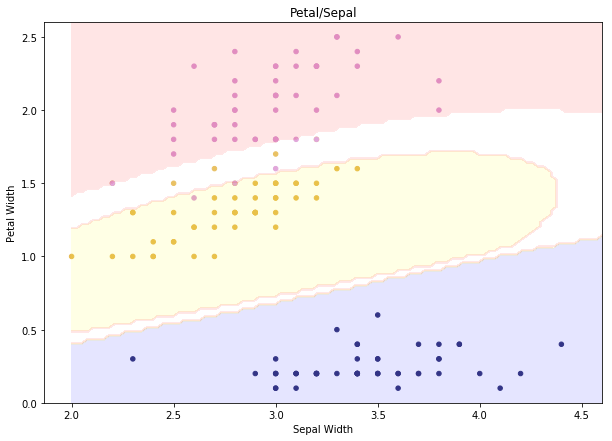

In [29]:
ax = data.plot(x = "Sepal Width" , y = "Petal Width" , kind = "scatter" , c = data["Classes"] , colormap = "tab20b" , colorbar = False , title = "Petal/Sepal" , figsize = (10,7)) #plot function of pandas
ax.contourf(xxx , yyy , classification_matrix , 3 , alpha = 0.1 , colors = ("blue" , "yellow" , "red" , "white"))

plt.show()

In [30]:
#We generate the classifications for test dataset
test_predictions = []
for i in range(len(data_test.index)):
    test_predictions.append(discriminant_2(data_test.values[i,1:3] , means_data , covs_data , flowers , proportions_per_class , lamb = 0.15))

In [31]:
test_predictions = np.array(test_predictions) ; print(test_predictions)
print(np.array(data_test.values[:,0]))

[1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 3 0 1 2 0 0 0 1 2 2 1]
[1. 2. 0. 0. 1. 2. 1. 1. 1. 2. 2. 0. 0. 0. 2. 0. 1. 0. 1. 2. 0. 1. 2. 0.
 0. 0. 1. 2. 2. 1.]


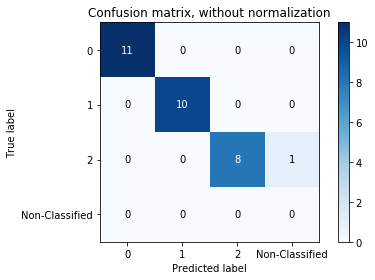

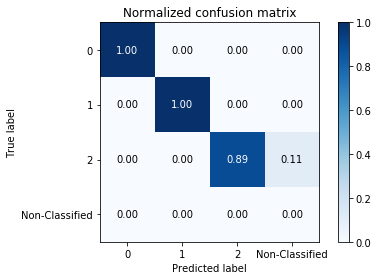

In [34]:
#Plotting the confusion matrix in a fancy way
np.seterr(divide='ignore', invalid='ignore')
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    cm[np.isnan(cm)] = 0
    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=np.append(classes[classes != 3] , 'Non-Classified'), yticklabels=np.append(classes[classes != 3] , 'Non-Classified'),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    #Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision = 2)

#Plot non-normalized confusion matrix
plot_confusion_matrix(np.array(data_test.values[:,0]).astype(int), test_predictions , classes = np.append(flowers , 3) ,
                      title='Confusion matrix, without normalization')

#Plot normalized confusion matrix
plot_confusion_matrix(np.array(data_test.values[:,0]).astype(int), test_predictions , classes = np.append(flowers , 3) , normalize=True,
                      title='Normalized confusion matrix')

plt.show()
